In [2]:
import pandas as pd
import joblib 
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
i = joblib.load("s05_32x_stats.jl")
i['coverage'] = '32x'
j = joblib.load("s05_16x_stats.jl")
j['coverage'] = '16x'
k = joblib.load("s05_8x_stats.jl")
k['coverage'] = '8x'
data = pd.concat([i, j, k])

data['as_compP'] = data['as_TP'] + data['as_FP']
data['as_baseP'] = data['as_TP'] + data['as_FN']
data['as_compN'] = data['as_TN'] + data['as_FN']
data['as_baseN'] = data['as_TN'] + data['as_FP']
data['as_ppv'] = data['as_TP'] / data['as_compP']
data['as_tpr'] = data['as_TP'] / data['as_baseP']
data['as_tnr'] = data['as_TN'] / data['as_baseN']
data['as_npv'] = data['as_TN'] / data['as_compN']
data['as_acc'] = (data['as_TP'] + data['as_TN']) / (data['as_baseP'] + data['as_baseN'])
data['as_ba'] = (data['as_tpr'] + data['as_tnr']) / 2
data['as_f1'] = 2 * ((data['as_ppv'] * data['as_tpr']) / (data['as_ppv'] * data['as_tpr']))

data['new_precision'] = data['Present TP'] / (data['Present TP'] + data['Present FP'])
data['new_recall'] = data['Present TP'] / data['base cnt']

data['p_diff'] = data['new_precision'] - data['precision']
data['r_diff'] = data['recall'] - data['new_recall']


In [30]:
v = data.groupby(['program', 'coverage'])['gt_concordance'].mean().unstack()[['32x', '16x', '8x']]
v.loc[['orig', 'kanpig', 'svjedi', 'sniffles', 'cutesv']]

coverage,32x,16x,8x
program,,,
orig,0.743984,0.744647,0.744647
kanpig,0.786666,0.781310,0.755392
svjedi,0.713143,0.712650,0.704222
sniffles,0.748145,0.739704,0.699144
cutesv,0.707901,0.686062,0.636676


In [38]:
data[(data['coverage'] == '32x') & (data['program'] == 'orig')]['precision'].describe()

count    47.000000
mean      0.889038
std       0.053096
min       0.534659
25%       0.892020
50%       0.896922
75%       0.900564
max       0.906009
Name: precision, dtype: float64

In [39]:
data[(data['coverage'] == '32x') & (data['program'] == 'orig')]['FP'].describe()

count       47.000000
mean      2454.659574
std       1654.926995
min       2042.000000
25%       2169.000000
50%       2202.000000
75%       2256.000000
max      13547.000000
Name: FP, dtype: float64

In [41]:
data[(data['coverage'] == '32x')].groupby(['program'])['p_diff'].describe().T

program,cutesv,kanpig,orig,sniffles,svjedi
count,47.000000,47.000000,47.000000,47.000000,9.000000
mean,0.031142,0.029876,0.018562,0.029303,0.016147
std,0.046996,0.025033,0.009099,0.009698,0.001479
min,0.020861,0.022546,0.013777,0.023795,0.014782
25%,0.022491,0.025124,0.016332,0.026685,0.015209
50%,0.023599,0.025941,0.017066,0.027753,0.015626
75%,0.026312,0.027525,0.018294,0.029250,0.016463
max,0.346103,0.197400,0.078731,0.092928,0.019402


In [42]:
data['fewer_FP'] = data['FP'] - data['Present FP']

In [43]:
data[(data['coverage'] == '32x')].groupby(['program'])['fewer_FP'].describe().T

program,cutesv,kanpig,orig,sniffles,svjedi
count,47.000000,47.000000,47.000000,47.000000,9.000000
mean,860.127660,801.680851,529.085106,776.127660,385.555556
std,1528.430719,1120.200955,760.763885,760.489734,31.508376
min,552.000000,553.000000,316.000000,535.000000,345.000000
25%,618.000000,621.500000,402.500000,646.500000,362.000000
50%,639.000000,645.000000,425.000000,675.000000,384.000000
75%,659.500000,663.000000,434.500000,688.000000,402.000000
max,11113.000000,8315.000000,5630.000000,5873.000000,437.000000


In [44]:
data[(data['coverage'] == '32x')].groupby(['program'])['r_diff'].describe().T

program,cutesv,kanpig,orig,sniffles,svjedi
count,47.000000,47.000000,47.000000,47.000000,9.000000
mean,0.031261,0.014698,0.007733,0.010872,0.006679
std,0.001761,0.011066,0.016599,0.016653,0.001048
min,0.028256,0.010877,0.004176,0.007198,0.005528
25%,0.029915,0.012493,0.004842,0.008053,0.006213
50%,0.031125,0.013088,0.005271,0.008396,0.006475
75%,0.032615,0.013637,0.005789,0.008839,0.006826
max,0.036604,0.088690,0.119046,0.122533,0.009188


In [45]:
data['fewer_TP'] = data['TP-comp'] - data['Present TP']
data[(data['coverage'] == '32x')].groupby(['program'])['fewer_TP'].describe().T

program,cutesv,kanpig,orig,sniffles,svjedi
count,47.000000,47.000000,47.000000,47.000000,9.000000
mean,858.276596,399.340426,206.957447,292.829787,176.444444
std,89.891650,276.253765,417.331219,417.863787,21.668590
min,702.000000,298.000000,103.000000,181.000000,139.000000
25%,782.500000,330.000000,136.000000,219.000000,170.000000
50%,867.000000,360.000000,144.000000,237.000000,176.000000
75%,928.500000,382.000000,163.000000,248.500000,179.000000
max,1021.000000,2238.000000,3004.000000,3092.000000,223.000000


In [46]:
neum = data['new_recall'] * data['new_precision']
denom = data['new_recall'] + data['new_precision']
data['new_f1'] = 2 * (neum / denom)
data[(data['coverage'] == '32x')].groupby(['program'])['new_f1'].describe().T

program,cutesv,kanpig,orig,sniffles,svjedi
count,47.000000,47.000000,47.000000,47.000000,9.000000
mean,0.774989,0.785553,0.785713,0.787852,0.788592
std,0.010071,0.025148,0.035273,0.034399,0.002612
min,0.709395,0.617749,0.549571,0.557623,0.783714
25%,0.775206,0.787234,0.789060,0.790995,0.787467
50%,0.776699,0.789244,0.791105,0.793394,0.789029
75%,0.777991,0.791251,0.792419,0.794419,0.789717
max,0.781633,0.795303,0.795746,0.798290,0.792590


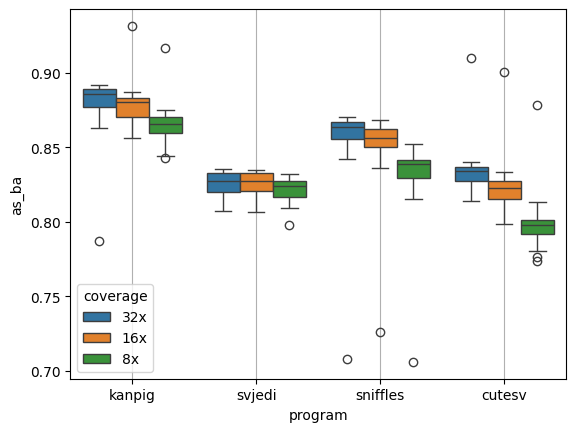

In [5]:
sb.boxplot(data=data[data['program'] != 'orig'], x="program", y="as_ba", hue="coverage")
plt.grid(axis='x')

[(0.0, 0.05),
 (0.0, 0.04),
 Text(0.5, 0, 'Precision Gain'),
 Text(0, 0.5, 'Recall Loss')]

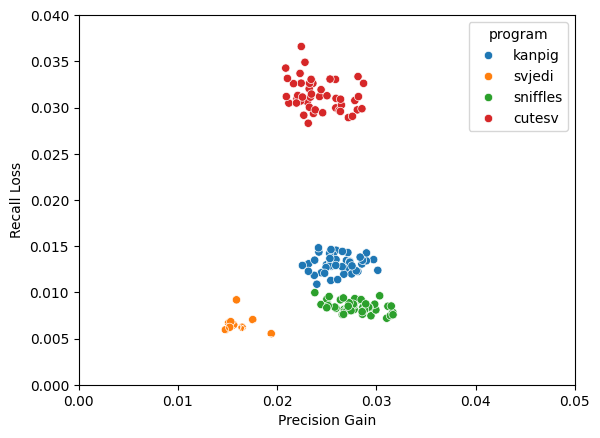

In [26]:
p = sb.scatterplot(data=data[data['coverage'] == '32x'], x="p_diff", y="r_diff", hue='program',
                   hue_order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])
p.set(xlim=(0, 0.05), ylim=(0, .04), xlabel="Precision Gain", ylabel="Recall Loss")